In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [13]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Get the data
walmart = pd.read_csv("walmart-sales-dataset-of-45stores.csv")

In [14]:
walmart_3 = walmart[["Store", "Holiday_Flag", "Fuel_Price", "Weekly_Sales"]]
walmart_3.head(5)

,Store,Holiday_Flag,Fuel_Price,Weekly_Sales
0,1,0,2.572,1643690.90
1,1,1,2.548,1641957.44
2,1,0,2.514,1611968.17
3,1,0,2.561,1409727.59
4,1,0,2.625,1554806.68


In [15]:
weekly_sales_col = walmart_3[["Weekly_Sales"]].to_numpy().flatten()
y = pd.cut((weekly_sales_col), bins=[0,1400000.00, 1550000.00, 1800000.00, float('inf')],labels=[0,1,2,3])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     walmart_3[["Store", "Holiday_Flag", "Fuel_Price"]], y, random_state=None)

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

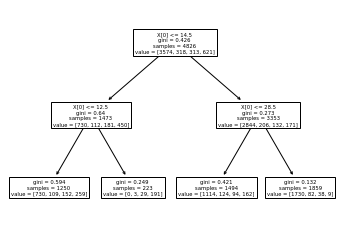

In [19]:
plot_tree(tree_clf);